In [168]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout

In [169]:
classifier = Sequential()

In [170]:
# Convolution
classifier.add(Conv2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

C:\Users\ajarun\AppData\Local\Continuum\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  


In [171]:
# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [172]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

C:\Users\ajarun\AppData\Local\Continuum\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


In [173]:
# Flattening
classifier.add(Flatten())

In [174]:
# Full connection
classifier.add(Dense(output_dim = 64, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

C:\Users\ajarun\AppData\Local\Continuum\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  
C:\Users\ajarun\AppData\Local\Continuum\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [175]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [176]:
classifier.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)              

In [177]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [178]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [179]:
training_set = train_datagen.flow_from_directory(r'C:\Users\ajarun\simplilearn\cnn\PetImages',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 277 images belonging to 2 classes.


In [185]:
test_set = test_datagen.flow_from_directory(r'C:\Users\ajarun\simplilearn\cnn\data\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 20 images belonging to 2 classes.


In [181]:
#!pip install pillow

In [182]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 50,
                         epochs =10,
                         validation_data = test_set,
                         validation_steps = 5)

Epoch 1/10
50/50 [==============================] - 17s 346ms/step - loss: 0.6502 - accuracy: 0.6259 - val_loss: 0.7873 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 16s 318ms/step - loss: 0.5876 - accuracy: 0.6701 - val_loss: 0.6968 - val_accuracy: 0.6500
Epoch 3/10
50/50 [==============================] - 15s 306ms/step - loss: 0.4704 - accuracy: 0.7686 - val_loss: 1.0249 - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - 15s 297ms/step - loss: 0.4176 - accuracy: 0.8071 - val_loss: 0.8878 - val_accuracy: 0.7000
Epoch 5/10
50/50 [==============================] - 15s 296ms/step - loss: 0.3282 - accuracy: 0.8553 - val_loss: 1.0782 - val_accuracy: 0.6000
Epoch 6/10
50/50 [==============================] - 15s 302ms/step - loss: 0.2878 - accuracy: 0.8781 - val_loss: 1.1395 - val_accuracy: 0.6500
Epoch 7/10
50/50 [==============================] - 15s 293ms/step - loss: 0.2565 - accuracy: 0.8939 - val_loss: 1.3552 - val_accuracy: 0.6500

[[1.]]
dog


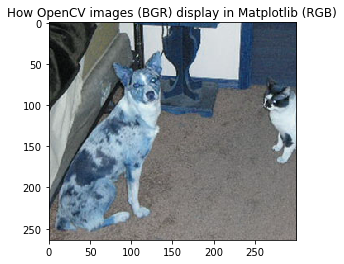

In [186]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\ajarun\simplilearn\cnn\data\train\dogs\7.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)
print(result)
training_set.class_indices
if result[0][0]>=0.5:
    prediction= 'dog'
else:
    prediction = 'cat'
print(prediction)

%matplotlib inline
imgloc = r'C:\Users\ajarun\simplilearn\cnn\data\train\dogs\7.jpg'
img= cv2.imread(imgloc)
plt.title('How OpenCV images (BGR) display in Matplotlib (RGB)')
plt.imshow(img)
plt.show()

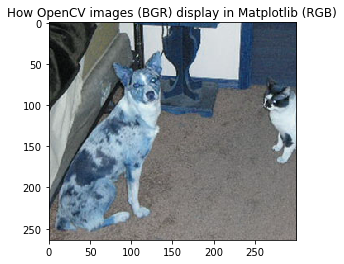

In [184]:
%matplotlib inline
imgloc = r'C:\Users\ajarun\simplilearn\cnn\data\train\dogs\7.jpg'
img= cv2.imread(imgloc)
plt.title('How OpenCV images (BGR) display in Matplotlib (RGB)')
plt.imshow(img)
plt.show()